## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
ds=pd.read_csv('csse_covid_19_daily_reports_us.csv')

In [3]:
# Top 5 rows and all columns
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
# Shape of Dataset
ds.shape

(58, 18)

The dataset contains 58 rows and 18 columns

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Observations:
    
    1) Columns Province State, Country Region, ISO3 are of Object datatypes.
    2) All other are categorical data

In [6]:
ds.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [7]:
ds.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Observations:
    
    1) Lat,Long_,Recovered,Incident Rate, People_Tested, People_Hospitalized,
       Mortality_Rate,Testing_Rate ,Hospitalization_Rate contains NaN values.
        
    2) Needed to replace NaN values with appropiate data.

## HANDLING NAN VALUES OF DATASET

###### Recovered = Confirmed - Active - Deaths

In [8]:
ds['Recovered1'] = ds['Confirmed']-ds['Active']-ds['Deaths']

In [9]:
ds = ds.drop('Recovered',axis = 1)

In [10]:
ds['People_Hospitalized'].describe()

count       33.000000
mean      4897.454545
std      13185.628145
min         65.000000
25%        535.000000
50%       1493.000000
75%       4389.000000
max      76410.000000
Name: People_Hospitalized, dtype: float64

In [11]:
ds['People_Hospitalized1'] = ds['People_Hospitalized'].replace(np.NaN,ds['People_Hospitalized'].min())

In [12]:
ds = ds.drop('People_Hospitalized',axis = 1)

In [13]:
ds['Hospitalization_Rate'].describe()

count    33.000000
mean     14.342541
std       5.047403
min       6.778043
25%      10.000000
50%      13.598326
75%      17.658649
max      28.054438
Name: Hospitalization_Rate, dtype: float64

In [14]:
ds['Hospitalization_Rate1'] = ((ds['People_Hospitalized1']*100)/ds['Confirmed'])

In [15]:
ds = ds.drop('Hospitalization_Rate',axis = 1)

In [16]:
ds['Hospitalization_Rate1'] = ds['Hospitalization_Rate1'].replace(np.inf, 0)

In [17]:
ds['Incident_Rate'].describe()

count      56.000000
mean      396.230806
std       402.682539
min         0.000000
25%       148.521021
50%       250.477287
75%       477.888542
max      1821.620216
Name: Incident_Rate, dtype: float64

In [18]:
ds['Incident_Rate'] = ds['Incident_Rate'].replace(np.NaN,ds['Incident_Rate'].quantile(0.25))

In [19]:
ds['People_Tested'].describe().astype(int)

count         56
mean      225853
std       298783
min          124
25%        46081
50%       138654
75%       279694
max      1505836
Name: People_Tested, dtype: int32

In [20]:
ds['People_Tested'] = ds['People_Tested'].fillna(ds['People_Tested'].quantile(0.25))

In [21]:
ds['Mortality_Rate'].describe()

count    57.000000
mean      4.458248
std       2.135002
min       0.000000
25%       3.072626
50%       4.403318
75%       5.466238
max       9.545549
Name: Mortality_Rate, dtype: float64

In [22]:
ds['Mortality_Rate'] = ds['Mortality_Rate'].fillna(ds['Mortality_Rate'].quantile(0.25))

In [23]:
ds['Testing_Rate'].describe()

count       56.000000
mean      3894.186870
std       1933.169297
min         97.702058
25%       2712.800274
50%       3469.782532
75%       4763.649736
max      11377.424693
Name: Testing_Rate, dtype: float64

In [24]:
ds['Testing_Rate'] = ds['Testing_Rate'].fillna(ds['Testing_Rate'].quantile(0.25))

In [25]:
ds.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            0
Mortality_Rate           0
UID                      0
ISO3                     0
Testing_Rate             0
Recovered1               0
People_Hospitalized1     0
Hospitalization_Rate1    0
dtype: int64

# BIVARIATE ANALYSIS

### Number of Active cases in Province State

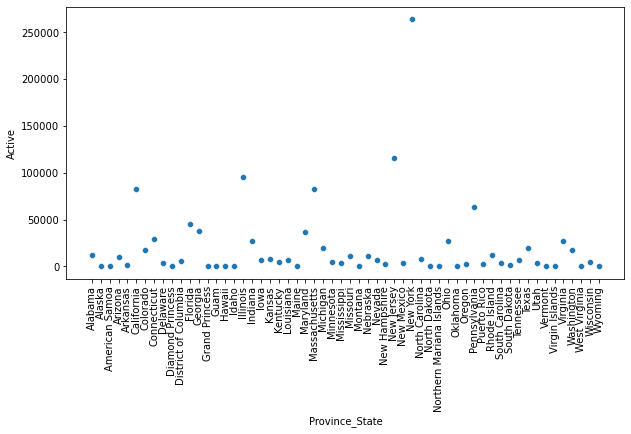

Maximum Active Cases is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,354370,28636,263848.0,36,1821.620216,1505836.0,8.080819,84000036,USA,7740.670204,61886.0,76410.0,21.562209


In [26]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Active'])
plt.show()


print('Maximum Active Cases is in :')

act=ds['Active'] == ds['Active'].max()
max_act=ds[act]
max_act

### Number of Deaths in Province State

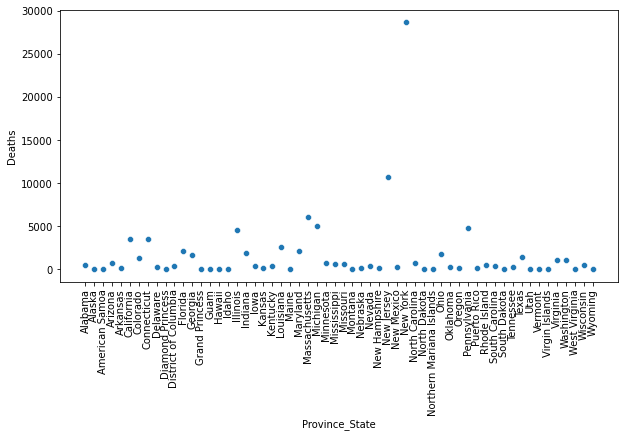

Maximum Deaths Cases is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,354370,28636,263848.0,36,1821.620216,1505836.0,8.080819,84000036,USA,7740.670204,61886.0,76410.0,21.562209


In [27]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Deaths'])
plt.show()


print('Maximum Deaths Cases is in :')

deat=ds['Deaths'] == ds['Deaths'].max()
max_deat=ds[deat]
max_deat

### Province State - Recovered

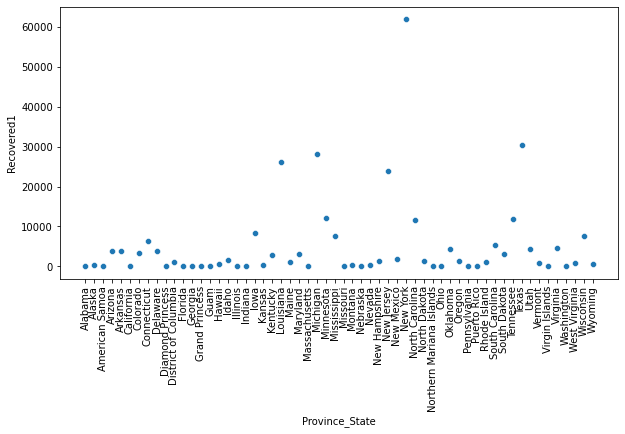

Maximum Recovered Cases is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,354370,28636,263848.0,36,1821.620216,1505836.0,8.080819,84000036,USA,7740.670204,61886.0,76410.0,21.562209


In [28]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Recovered1'])
plt.show()

print('Maximum Recovered Cases is in :')
reco=ds['Recovered1'] == ds['Recovered1'].max()
max_reco=ds[reco]
max_reco

### Province State - Confirmed

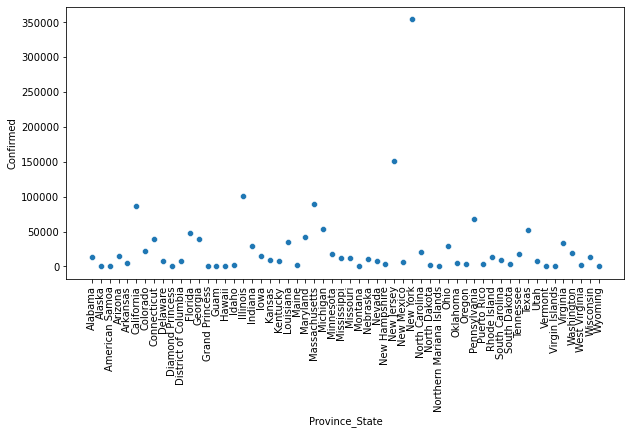

Maximum Confirmed Cases is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,354370,28636,263848.0,36,1821.620216,1505836.0,8.080819,84000036,USA,7740.670204,61886.0,76410.0,21.562209


In [29]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Confirmed'])
plt.show()

print('Maximum Confirmed Cases is in :')
conf=ds['Confirmed'] == ds['Confirmed'].max()
max_conf=ds[conf]
max_conf

### Province State - Testing Rate

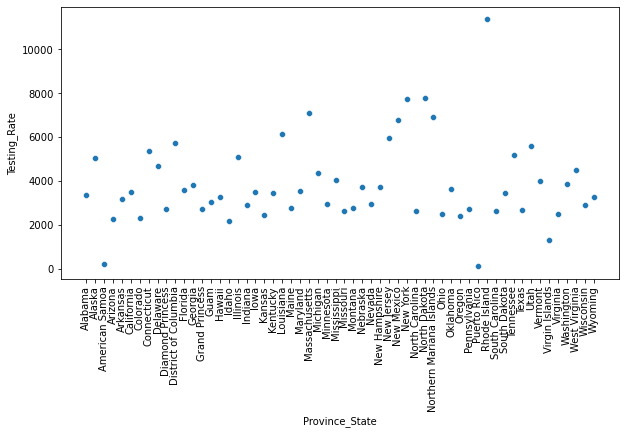

Maximum Testing is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
45,Rhode Island,US,2020-05-21 02:32:54,41.6809,-71.5118,13356,538,11788.0,44,1260.760024,120528.0,4.028152,84000044,USA,11377.424693,1030.0,1486.0,11.126086


In [30]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Testing_Rate'])
plt.show()


print('Maximum Testing is in :')
test=ds['Testing_Rate'] == ds['Testing_Rate'].max()
max_test=ds[test]
max_test

### Province State - Hospitalization_Rate

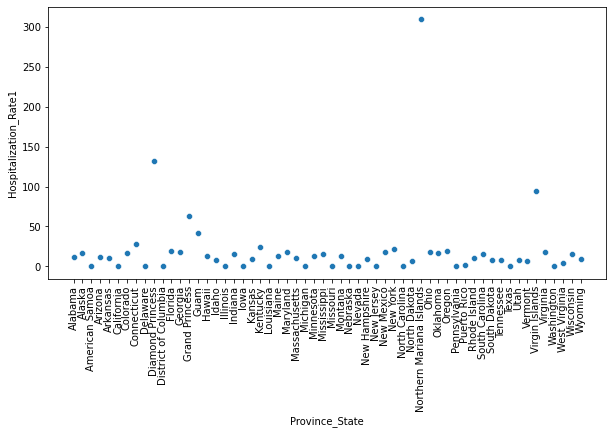

Maximum Hospitalization_Rate is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,21,2,6.0,69,38.082112,3817.0,9.52381,580,MNP,6921.877267,13.0,65.0,309.52381


In [31]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Hospitalization_Rate1'])
plt.show()

print('Maximum Hospitalization_Rate is in :')
hora=ds['Hospitalization_Rate1'] == ds['Hospitalization_Rate1'].max()
max_hora=ds[hora]
max_hora

### Province State - Incident Rate

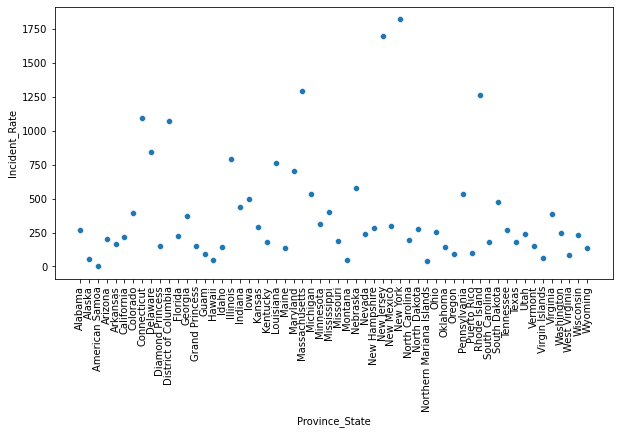

Maximum Incident_Rate is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,354370,28636,263848.0,36,1821.620216,1505836.0,8.080819,84000036,USA,7740.670204,61886.0,76410.0,21.562209


In [32]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Incident_Rate'])
plt.show()


print('Maximum Incident_Rate is in :')
insi=ds['Incident_Rate'] == ds['Incident_Rate'].max()
max_insi=ds[insi]
max_insi

### Province State - People Tested

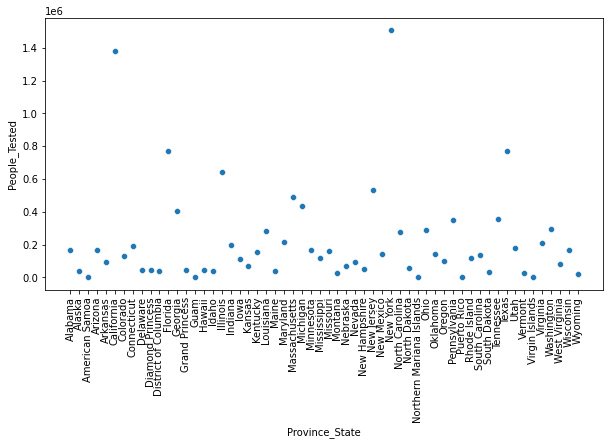

Maximum Testing is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,354370,28636,263848.0,36,1821.620216,1505836.0,8.080819,84000036,USA,7740.670204,61886.0,76410.0,21.562209


In [33]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['People_Tested'])
plt.show()


print('Maximum Testing is in :')
ptest=ds['People_Tested'] == ds['People_Tested'].max()
max_ptest=ds[ptest]
max_ptest

### Province State - Mortality Rate

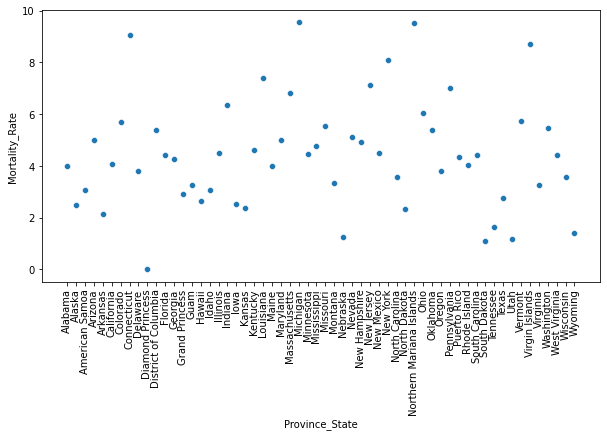

Maximum Mortality Rate is in :


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
26,Michigan,US,2020-05-21 02:32:54,43.3266,-84.5361,53009,5060,19715.0,26,530.787614,437072.0,9.545549,84000026,USA,4376.471997,28234.0,65.0,0.122621


In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['Province_State'],y =ds['Mortality_Rate'])
plt.show()


print('Maximum Mortality Rate is in :')
mort=ds['Mortality_Rate'] == ds['Mortality_Rate'].max()
max_mort=ds[mort]
max_mort

## Label Encoding of Columns

In [35]:
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder()

In [36]:
ds['Province_State'] = le.fit_transform(ds['Province_State'])

In [37]:
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
0,0,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386,0.0,1493.0,11.438860
1,1,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017,352.0,65.0,16.209476
2,2,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,60,0.000000,124.0,3.072626,16,ASM,222.857246,0.0,65.0,0.000000
3,3,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351,3773.0,1792.0,12.022005
4,4,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370,3852.0,535.0,10.693584


# CORRELATION CHECK

In [38]:
dscorr=ds.corr()
dscorr

,Province_State,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
Province_State,1.000000,0.157083,0.091266,0.006490,0.015229,-0.027612,-0.195045,-0.055144,-0.042884,0.036980,-0.031331,0.105118,0.136544,0.013450,0.020486
Lat,0.157083,1.000000,-0.278274,0.120959,0.120024,0.120148,-0.374943,0.245693,0.084769,-0.083466,0.774106,0.309579,0.086858,0.079221,-0.324381
Long_,0.091266,-0.278274,1.000000,0.009998,0.028772,0.011654,0.367911,0.041318,-0.077781,0.330870,-0.526908,0.190191,-0.007089,0.034206,0.685271
Confirmed,0.006490,0.120959,0.009998,1.000000,0.982191,0.985218,-0.096696,0.714857,0.829789,0.386957,0.153972,0.341314,0.756823,0.847085,-0.108248
Deaths,0.015229,0.120024,0.028772,0.982191,1.000000,0.954378,-0.075053,0.714036,0.743393,0.430071,0.120043,0.350774,0.782292,0.889134,-0.074420
Active,-0.027612,0.120148,0.011654,0.985218,0.954378,1.000000,-0.092276,0.706886,0.831285,0.371837,0.146354,0.329810,0.634259,0.816697,-0.101298
FIPS,-0.195045,-0.374943,0.367911,-0.096696,-0.075053,-0.092276,1.000000,-0.114537,-0.112038,-0.259092,0.058022,-0.113660,-0.092894,-0.051493,0.324913
Incident_Rate,-0.055144,0.245693,0.041318,0.714857,0.714036,0.706886,-0.114537,1.000000,0.448830,0.392257,0.255842,0.625563,0.526023,0.536996,-0.183583
People_Tested,-0.042884,0.084769,-0.077781,0.829789,0.743393,0.831285,-0.112038,0.448830,1.000000,0.256701,0.227567,0.240557,0.601467,0.612858,-0.164764
Mortality_Rate,0.036980,-0.083466,0.330870,0.386957,0.430071,0.371837,-0.259092,0.392257,0.256701,1.000000,-0.196480,0.209749,0.310552,0.289839,0.241381


## Correlation Heatmap

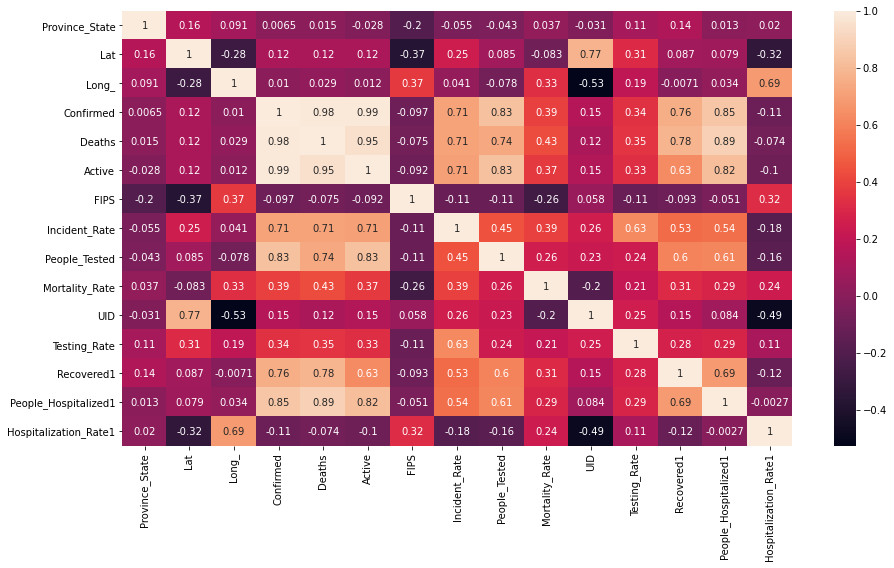

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(dscorr,annot=True)
plt.show()

Observations:
    
    1) All columns are correlated with Deaths column except Hospitality Rate and FIPS.
    2) Confirmed is highly corelated with target attribute.

# CHECKING OUTLIERS

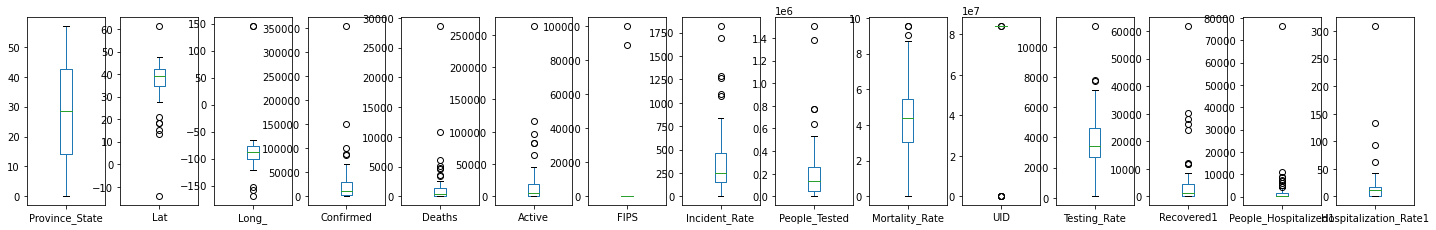

In [40]:
ds.plot(kind='box',subplots=True,layout=(5,30),figsize=(50,20))
plt.show()

All columns contains outliers. Lets see whether we will keep outliers or not.

Before creating model we can drop un necessary columns:
    
    1) Dropping column Province_State,Country_Region,Last_Update,Lat,Long_,UID,ISO3

In [41]:
# Dropping Columns
ds = ds.drop(['Country_Region','Last_Update','Lat','Long_','UID','ISO3','FIPS'],axis = 1)

In [42]:
# Dataset after dropping columns
ds.head()

,Province_State,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Recovered1,People_Hospitalized1,Hospitalization_Rate1
0,0,13052,522,12530.0,266.194321,164450.0,3.999387,3353.942386,0.0,1493.0,11.438860
1,1,401,10,39.0,54.815493,37045.0,2.493766,5063.940017,352.0,65.0,16.209476
2,2,0,0,0.0,0.000000,124.0,3.072626,222.857246,0.0,65.0,0.000000
3,3,14906,747,10386.0,204.788838,165435.0,5.011405,2272.859351,3773.0,1792.0,12.022005
4,4,5003,107,1044.0,165.782801,96258.0,2.138717,3189.670370,3852.0,535.0,10.693584


# Removing Outliers

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[1.70244092e+00, 2.62999251e-01, 2.68934023e-01, 1.84202386e-01,
        3.07794921e-01, 1.88541510e-01, 2.06577329e-01, 2.63618332e-01,
        4.92504699e-01, 1.31072892e-01, 1.89894567e-01],
       [1.64270615e+00, 5.05788407e-01, 3.95372994e-01, 4.89328519e-01,
        8.43302174e-01, 6.23672542e-01, 9.21630399e-01, 6.38844916e-01,
        4.58340357e-01, 2.72708980e-01, 8.18987876e-02],
       [1.58297138e+00, 5.13484119e-01, 3.97842505e-01, 4.90281199e-01,
        9.82171779e-01, 7.49770206e-01, 6.46716879e-01, 1.91607048e+00,
        4.92504699e-01, 2.72708980e-01, 4.48844041e-01],
       [1.52323661e+00, 2.27418578e-01, 2.13370022e-01, 2.36575329e-01,
        4.63359608e-01, 1.85177403e-01, 2.74052362e-01, 8.34167489e-01,
        1.26305654e-01, 1.01416597e-01, 1.76693515e-01],
       [1.46350184e+00, 4.17470037e-01, 3.71418736e-01, 4.64778702e-01,
        5.62177527e-01, 4.21440182e-01, 1.09025096e+00, 3.50314041e-01,
        1.18638089e-01, 2.26092060e-01, 2.06765904e-

In [44]:
threshold=3
print(np.where(z>3))

(array([ 5, 34, 36, 36, 36, 36, 36, 36, 36, 39, 45], dtype=int64), array([ 5,  4,  1,  2,  3,  4,  5,  8,  9, 10,  7], dtype=int64))


In [45]:
ds_new=ds[(z<3).all(axis=1)]

In [46]:
ds_new.shape

(53, 11)

In [47]:
ds.shape

(58, 11)

### %age loss of data after removal of outliers is ~8% which is not good.

## DISTRIBUTION PLOT

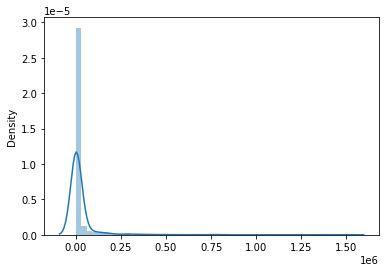

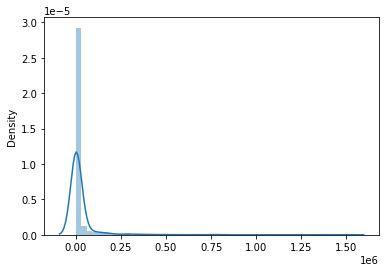

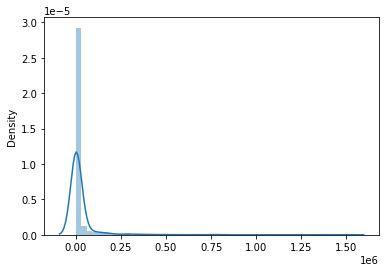

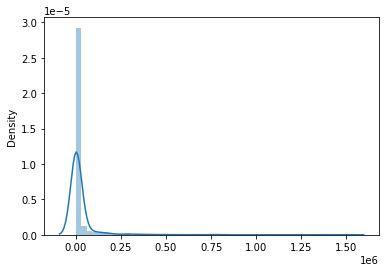

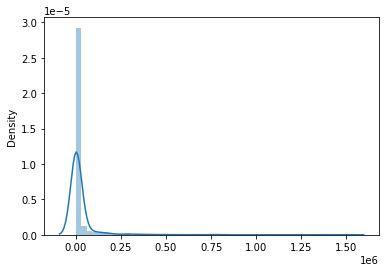

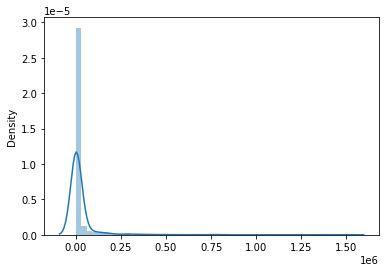

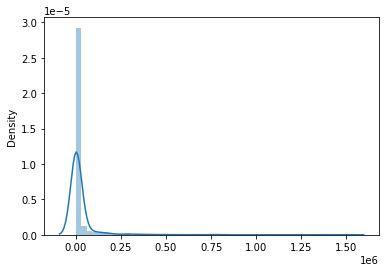

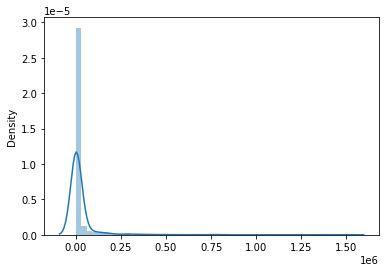

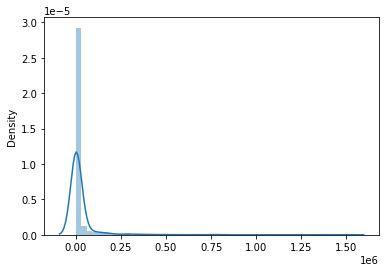

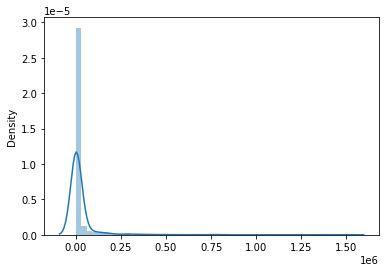

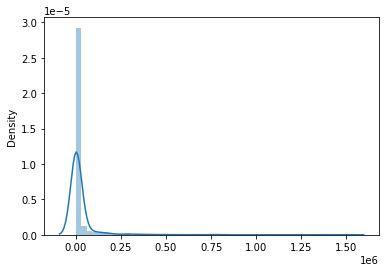

In [48]:
i = ds.columns

for val in i:
    sns.distplot(ds[i])
    plt.show()

In [71]:
# Selecting X-Variables
x= ds.drop(['Deaths','Recovered1'], axis = 1)

In [72]:
# Selecting Y-Variables
y=ds[['Deaths','Recovered1']]

## Loading Libraries for Model Preparation

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [73]:
sc = StandardScaler()

# Scaling X-Variable
x=sc.fit_transform(x)

lr=LinearRegression()

In [53]:
x.shape

(58, 9)

In [54]:
y.shape

(58, 2)

## LOOP FOR BEST ACCURACY AND RAMDOM STATE 

In [55]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu *100} found on random_state {best_rstate}")

Best Accuracy 99.74749055397629 found on random_state 110


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=110)

In [57]:
i=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),Ridge(),ElasticNet()]

for i in i:
    i.fit(x_train,y_train)
    j=i.score(x_train,y_train)
    predi=i.predict(x_test)
    print("R2_Score of ",i,'=',r2_score(y_test,predi))
    print("Mean Absolute Error", mean_absolute_error(y_test,predi))
    print("Root Mean Squared Error", (mean_squared_error(y_test,predi))**0.5 )
    print('\n')
    print('-----------------------------------------------------------------------------------------------------------------')

R2_Score of  LinearRegression() = 0.9974749055397629
Mean Absolute Error 419.3440706733046
Root Mean Squared Error 497.65812248719175


-----------------------------------------------------------------------------------------------------------------
R2_Score of  KNeighborsRegressor() = 0.10860316757820698
Mean Absolute Error 5628.5
Root Mean Squared Error 13195.618444266516


-----------------------------------------------------------------------------------------------------------------
R2_Score of  RandomForestRegressor() = 0.21799498661939387
Mean Absolute Error 5298.052083333333
Root Mean Squared Error 12066.422754189101


-----------------------------------------------------------------------------------------------------------------
R2_Score of  Lasso() = 0.9966220277949045
Mean Absolute Error 438.2829846971572
Root Mean Squared Error 543.9909108656681


-----------------------------------------------------------------------------------------------------------------
R2_Score of  

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
i=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(),Lasso(),Ridge(),ElasticNet()]

for i in i:
    i.fit(x_train,y_train)
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross Validation Score of ',i, 'is',cvs)
    print('Mean is =',cvs.mean(),'and Standard Deviation is =',cvs.std())
    print('\n')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Cross Validation Score of  LinearRegression() is [0.59171615 0.90377231 0.97324132 0.97450674 0.22222836]
Mean is = 0.7330929760551607 and Standard Deviation is = 0.29190866015654


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Cross Validation Score of  KNeighborsRegressor() is [-0.56250875  0.61058578  0.25326166  0.13137834  0.28795955]
Mean is = 0.14413531287807835 and Standard Deviation is = 0.3872153364537267


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Cross Validation Score of  RandomForestRegressor() is [-5.15214307  0.54523092  0.66841294  0.2129047  -1.02017921]
Mean is = -0.949154745786592 and Standard Deviation is = 2.1849600115224144


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Cross Validation Score of  Lasso() is [0.61318754 0.90211705 0.97179761 0.97323598 

# HYPER PARAMETER TUNING USING GRIDSEARCHCV

## L1 AND L2 REGULARIZATION
        
    L1 - Lasso
    L2 - Rigde

### Lasso

In [60]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100)),'max_iter': [2000]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'max_iter': 2000, 'random_state': 0}


In [61]:
ls = Lasso(alpha=10,random_state=0,max_iter=2000)
ls.fit(x_train,y_train)
predi=ls.predict(x_test)
print("R2_Score of ",ls,'=',r2_score(y_test,predi))
print("Mean Absolute Error", mean_absolute_error(y_test,predi))
print("Root Mean Squared Error", (mean_squared_error(y_test,predi))**0.5 )

R2_Score of  Lasso(alpha=10, max_iter=2000, random_state=0) = 0.974267063672837
Mean Absolute Error 591.3362176513947
Root Mean Squared Error 1271.4906182156133


### Ridge

In [62]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(40,100))}
rg=Ridge()
clf=GridSearchCV(rg,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 40}


In [63]:
rg = Ridge(alpha=0.1,random_state=40)
rg.fit(x_train,y_train)
predi=ls.predict(x_test)
print("R2_Score of ",rg,'=',r2_score(y_test,predi))
print("Mean Absolute Error", mean_absolute_error(y_test,predi))
print("Root Mean Squared Error", (mean_squared_error(y_test,predi))**0.5 )

R2_Score of  Ridge(alpha=0.1, random_state=40) = 0.974267063672837
Mean Absolute Error 591.3362176513947
Root Mean Squared Error 1271.4906182156133


### ElasticNet

In [64]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100)),'max_iter': [2000]}
eln=ElasticNet()
clf=GridSearchCV(eln,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'max_iter': 2000, 'random_state': 0}


In [65]:
eln = Ridge(alpha=0.001,random_state=40)
eln.fit(x_train,y_train)
predelni=eln.predict(x_test)
print("R2_Score of ",rg,'=',r2_score(y_test,predelni))
print("Mean Absolute Error", mean_absolute_error(y_test,predelni))
print("Root Mean Squared Error", (mean_squared_error(y_test,predelni))**0.5 )

R2_Score of  Ridge(alpha=0.1, random_state=40) = 0.9974903873973147
Mean Absolute Error 412.608777971466
Root Mean Squared Error 485.90887397828294


We can see that Elastic Net is giving the best accuracy of 99.75%.

In [66]:
y_test

,Deaths,Recovered1
37,726,11637.0
24,2123,2993.0
30,16,440.0
13,3,0.0
22,2608,26249.0
54,1037,0.0
36,28636,61886.0
56,481,7728.0
27,786,12227.0
29,640,0.0


In [67]:
predelni

array([[  975.01230397, 11373.59649526],
       [ 2909.04315391,  2202.20693807],
       [ -112.33429878,   568.49194377],
       [ -304.95365134,   308.35773476],
       [ 2904.8222664 , 25909.27080779],
       [  717.94919553,   340.75631674],
       [27787.76883836, 62395.74819799],
       [  641.49023827,  7559.5299196 ],
       [ 1267.361737  , 11722.73477462],
       [  574.20693021,    79.60712608],
       [ 2228.44874008,  -533.56249684],
       [ 1951.96798073,  3639.08361589]])

In [68]:
import joblib

In [69]:
joblib.dump(rg,'Covid 19.pkl')

['Covid 19.pkl']